# Enunciado projeto 03

O objetivo deste projeto é construir um modelo preditivo capaz de calcular o preço de um imóvel no bairro Vila Nova Conceição na cidade de São Paulo. 

Para completar este projeto cada aluno deverá seguir as orientações que estão neste notebook e preencher as células vazias. 

Este projeto é individual. O link do notebook totalmente preenchido deverá ser submetido no black até o dia 30/10/2019.

# Aquisição, pré-processamento e análise descritiva

In [1]:
import pandas as pd
import io
import requests
url="https://media.githubusercontent.com/media/fbarth/ml-espm/master/data/20140917_imoveis_filtrados_final.csv_shaped.csv"
s=requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=",")

In [2]:
df.head()

,bairro,preco,area,suites,dormitorios,banheiros,vagas
0,vila-nova-conceicao,490000.0,32.0,1.0,1.0,1.0,1.0
1,vila-nova-conceicao,3180000.0,157.0,2.0,2.0,2.0,2.0
2,vila-nova-conceicao,1900000.0,205.0,2.0,3.0,3.0,3.0
3,vila-nova-conceicao,3565000.0,193.0,3.0,3.0,3.0,3.0
4,vila-nova-conceicao,1605000.0,116.0,1.0,3.0,2.0,2.0


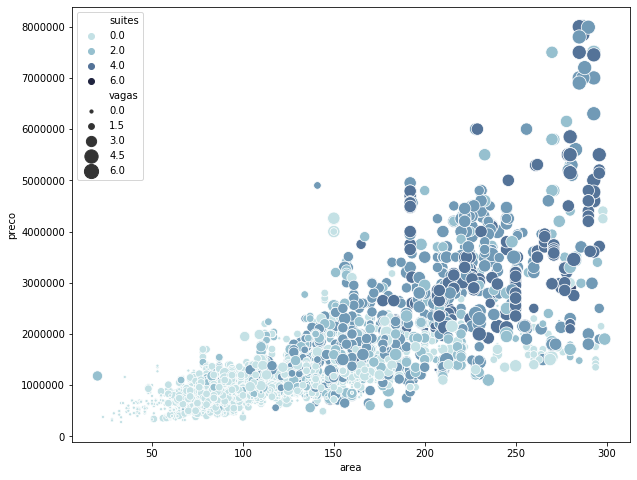

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

In [4]:
df['bairro'].value_counts()

vila-mariana           1714
paraiso                 809
vila-nova-conceicao     794
vila-sonia              314
perto_ibirapuera        129
Name: bairro, dtype: int64

* Considere apenas os imóveis do bairo vila-nova-conceicao

In [5]:
df = df[df['bairro'] == 'vila-nova-conceicao']

* Depois de considerar apenas os imóveis do bairro vila-nova-conceicao o tamanho do dataset precisa ser exatamente igual a: 

In [6]:
df.shape

(794, 7)

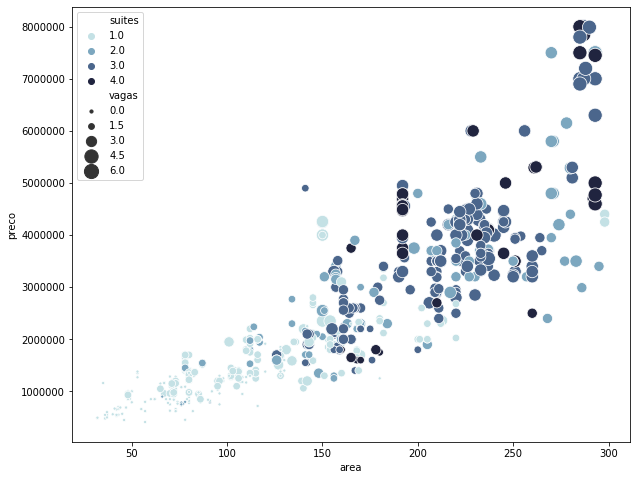

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

In [8]:
df.head()

,bairro,preco,area,suites,dormitorios,banheiros,vagas
0,vila-nova-conceicao,490000.0,32.0,1.0,1.0,1.0,1.0
1,vila-nova-conceicao,3180000.0,157.0,2.0,2.0,2.0,2.0
2,vila-nova-conceicao,1900000.0,205.0,2.0,3.0,3.0,3.0
3,vila-nova-conceicao,3565000.0,193.0,3.0,3.0,3.0,3.0
4,vila-nova-conceicao,1605000.0,116.0,1.0,3.0,2.0,2.0


* A quantidade suites não pode ser maior que a quantidade de dormitórios e a quantidade de suites também não pode ser maior que a quantidade de banheiros. Exclua todos os exemplos que não satisfazem esta restrição. Estes exemplos provavelmente são erros de coleta de dados.

In [9]:
df = df[(df['suites'] <= df['dormitorios']) & (df['suites'] <= df['banheiros'])]

* Depois deste filtro o dataset precisa ter o tamanho abaixo: 

In [10]:
df.shape

(772, 7)

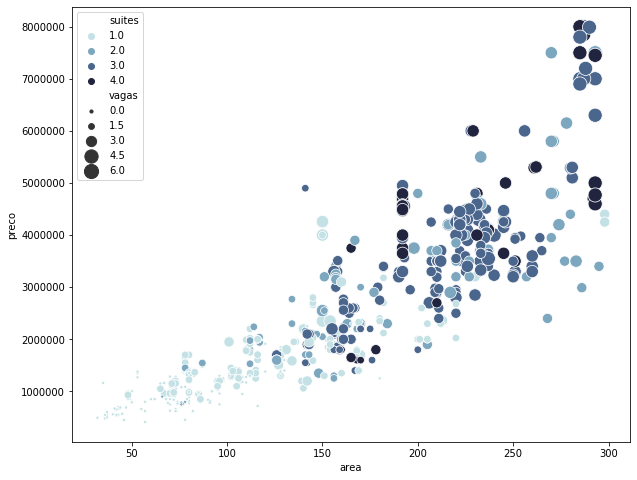

In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10, 8))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="area", y="preco",
                     hue="suites", size="vagas",
                     palette=cmap, sizes=(10, 200),
                     data=df)

* Visto que agora a variável bairro tem apenas um valor, você deve remover a mesma

In [12]:
df = df.iloc[:, 1:]

* Depois deste filtro o dataset precisa ter a seguinte estrutura:

In [13]:
df.head()

,preco,area,suites,dormitorios,banheiros,vagas
0,490000.0,32.0,1.0,1.0,1.0,1.0
1,3180000.0,157.0,2.0,2.0,2.0,2.0
2,1900000.0,205.0,2.0,3.0,3.0,3.0
3,3565000.0,193.0,3.0,3.0,3.0,3.0
4,1605000.0,116.0,1.0,3.0,2.0,2.0


* Qual é o valor mínimo e máximo dos preços dos imóveis? 

In [14]:
print('Preço mínimo:', df['preco'].min())
print('Preço máximo:', df['preco'].max())

Preço mínimo: 411500.0
Preço máximo: 8000000.0


# Divisão dos datasets

### Adicionando novas variáveis para melhorar o desempenho do modelo
### No caso, selecionei aquelas com maior correlação com o preço (apresentadas no gráfico abaixo)

In [15]:
df['area_vagas'] = df['area'] * df['vagas']
df['area_suites'] = df['area'] * df['suites']
df['area_dormitorios'] = df['area'] * df['dormitorios']
df['area_banheiros'] = df['area'] * df['banheiros']
df['suites_vagas'] = df['suites'] * df['vagas']
features = ['area', 'vagas', 'area_vagas', 'area_suites', 'area_dormitorios', 'area_banheiros', 'suites_vagas']
X = df[features]
y = df[['preco']]
df.head()

,preco,area,suites,dormitorios,banheiros,vagas,area_vagas,area_suites,area_dormitorios,area_banheiros,suites_vagas
0,490000.0,32.0,1.0,1.0,1.0,1.0,32.0,32.0,32.0,32.0,1.0
1,3180000.0,157.0,2.0,2.0,2.0,2.0,314.0,314.0,314.0,314.0,4.0
2,1900000.0,205.0,2.0,3.0,3.0,3.0,615.0,410.0,615.0,615.0,6.0
3,3565000.0,193.0,3.0,3.0,3.0,3.0,579.0,579.0,579.0,579.0,9.0
4,1605000.0,116.0,1.0,3.0,2.0,2.0,232.0,116.0,348.0,232.0,2.0


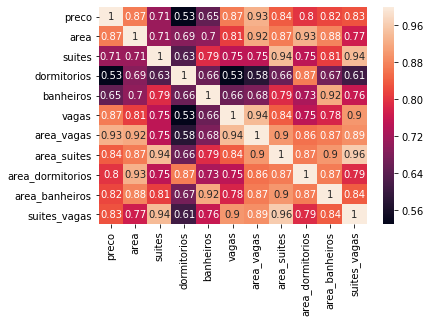

In [48]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### Normalizando as variáveis

In [42]:
import sklearn.preprocessing as preproc
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X.shape

(772, 7)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Criação do modelo preditivo

Crie um modelo de regressão utilizando os algoritmos e transformações nos atributos que você considera mais adequados.

Descreva nas células abaixo todas as etapas necessárias para o desenvolvimento do modelo.

In [44]:
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [300, 500, 700],
    'max_features': ['log2', 'sqrt', 7],
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]
}
rfr = RandomForestRegressor(random_state=4, criterion='mae')
CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, verbose=1, n_jobs=4)
CV_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   44.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done 495 out of 495 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mae',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=4,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=4,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,

## Validação do modelo

Valide o modelo desenvolvido considerando os datasets X_test e y_test. Espera-se que o erro médio absoluto seja inferior a trezentos mil reais (R$ 300.000,00). 

Descreva nas células abaixo todas as etapas necessárias para a validação do modelo.

In [25]:
from sklearn.metrics import mean_absolute_error
import numpy as np

In [46]:
y_pred = CV_rfr.predict(X_test)

In [47]:
mean_absolute_error(y_test, y_pred)

281662.1607649769